In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


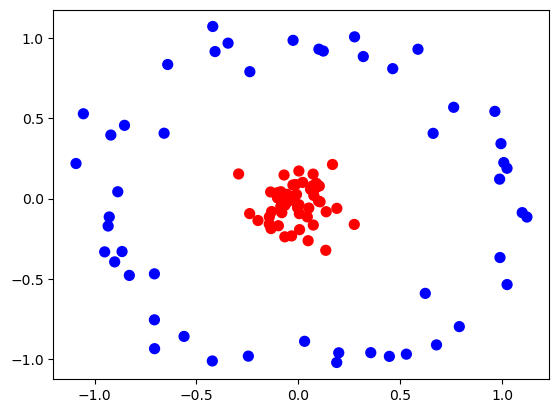

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    
    # Flatten grid and predict
    grid = np.array([X1.ravel(), X2.ravel()]).T
    preds = clf.predict(grid)
    Z = preds.reshape(X1.shape)
    
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title("Decision Boundary")
    plt.show()


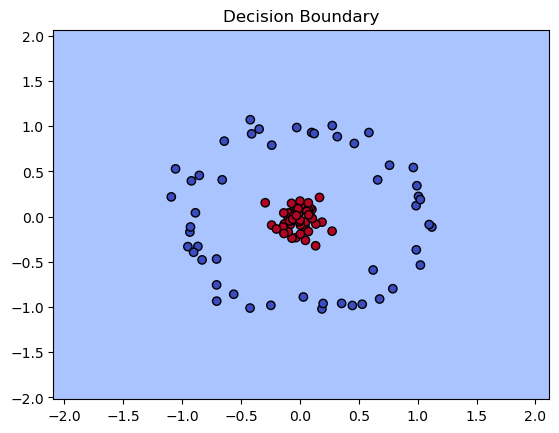

In [15]:
plot_decision_boundary(X, y, classifier)

In [16]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

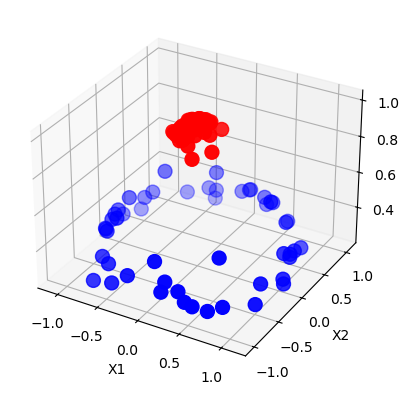

In [17]:

plot_3d_plot(X,y)

In [18]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [19]:

accuracy_score(y_test, y_pred)

1.0

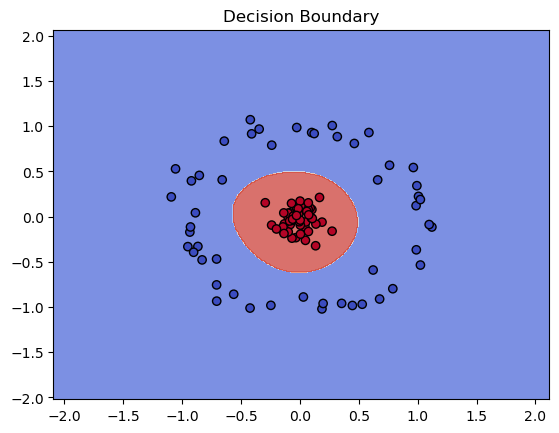

In [20]:

plot_decision_boundary(X, y, rbf_classifier)

In [21]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [22]:

accuracy_score(y_test, y_pred)

1.0

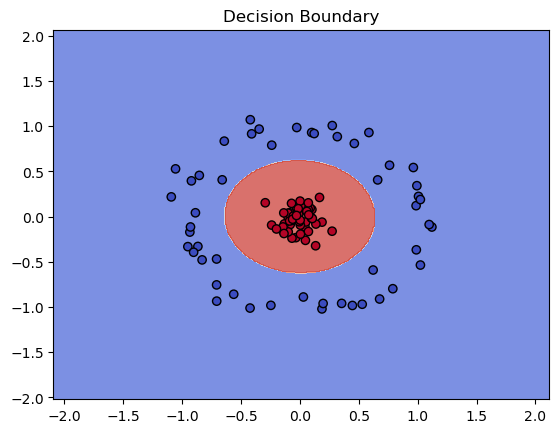

In [23]:
plot_decision_boundary(X, y, poly_classifier)

In [24]:

X

array([[ 0.44634409, -0.98286083],
       [-0.86503966, -0.32961018],
       [ 0.02101781,  0.10128249],
       [-1.09086039,  0.21888459],
       [-0.03344698, -0.23233131],
       [-0.70623897, -0.75505442],
       [ 0.27553131,  1.00813233],
       [-0.95020549, -0.33172433],
       [ 0.1006053 ,  0.93123872],
       [-0.93325279, -0.17062245],
       [ 0.04365274, -0.11371147],
       [-0.42229136, -1.0114245 ],
       [ 0.12207547,  0.91948689],
       [ 0.07307624, -0.16455203],
       [ 0.18798805, -1.02086399],
       [ 1.12102662, -0.1146917 ],
       [-0.14294723, -0.1585233 ],
       [-0.08125013, -0.08748519],
       [-0.10247431,  0.00457367],
       [ 0.08438605,  0.06640537],
       [ 0.67746763, -0.91130318],
       [-0.02609838,  0.98634999],
       [-0.24550132, -0.98131204],
       [ 0.62238151, -0.59027565],
       [ 0.10259026,  0.07848719],
       [ 1.02372256, -0.5354178 ],
       [-0.02688527,  0.0850424 ],
       [ 0.13429118, -0.32190629],
       [-0.05576402,

In [25]:
np.exp(-(X**2)).sum(1)

array([1.19996366, 1.370224  , 1.98935264, 1.25744758, 1.94633503,
       1.17273987, 1.28881313, 1.30119356, 1.41005355, 1.38985688,
       1.98524919, 1.19618842, 1.41456953, 1.96796003, 1.31796853,
       1.27152339, 1.95495693, 1.98579572, 1.98953304, 1.98850432,
       1.06778189, 1.37730958, 1.32326556, 1.38464612, 1.98338913,
       1.10139333, 1.99207132, 1.88369205, 1.99618562, 1.98320463,
       1.14638203, 1.1293375 , 1.9405461 , 1.31321888, 1.06571013,
       1.40980376, 1.96139874, 1.32625579, 1.02531417, 1.9357889 ,
       1.2830814 , 1.28360665, 1.96232278, 1.8942183 , 1.99932578,
       1.99085837, 1.98849784, 1.26178366, 1.4797459 , 1.92814317,
       1.99922503, 1.2789459 , 1.99398908, 1.97079941, 1.45432096,
       1.20861455, 1.99404281, 1.97644919, 1.9670577 , 1.40997618,
       1.93129924, 1.99029249, 1.29484254, 1.16029954, 1.99125532,
       1.98867859, 1.30004016, 1.36281305, 1.31572427, 1.9799436 ,
       1.27967478, 1.94793363, 1.45279924, 1.99003561, 1.97493

In [26]:
X_new=np.exp(-(X**2))

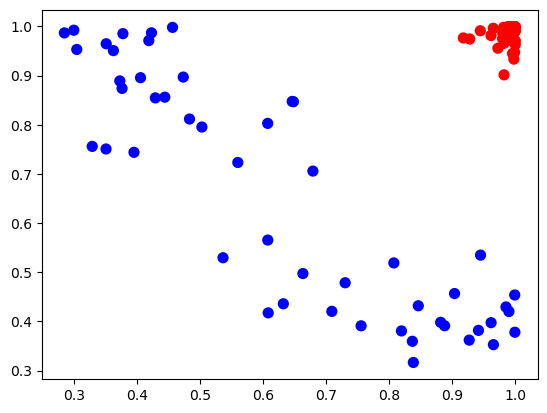

In [27]:

plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')